# Box office prediction

### load the dataset

In [513]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [667]:
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

In [668]:
Train.shape

(3000, 23)

In [669]:
Test.shape

(4398, 22)

In [670]:
Train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

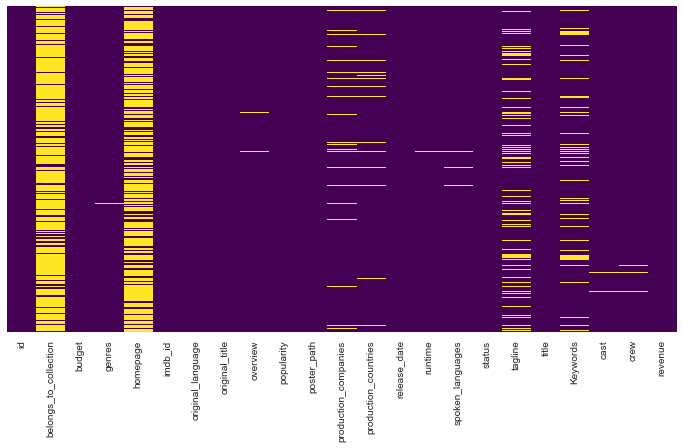

In [671]:
sns.heatmap(Train.isnull(), cmap='viridis', cbar=False, yticklabels=[])
fig = plt.gcf()
fig.set_size_inches(12, 6); # apparently, we have many missing data points

In [672]:
Test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

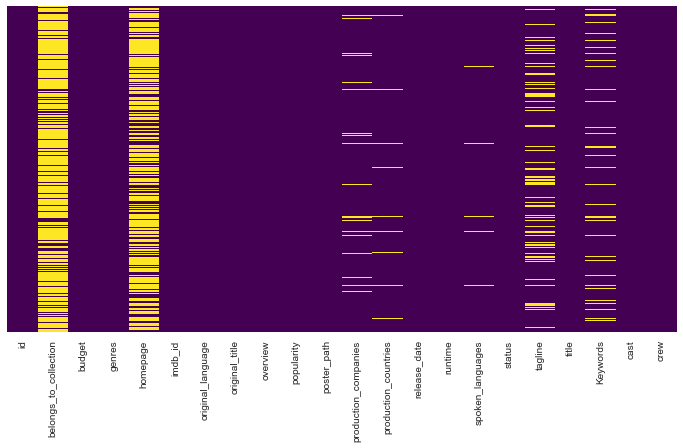

In [673]:
sns.heatmap(Test.isnull(), cmap='viridis', cbar=False, yticklabels=[])
fig = plt.gcf()
fig.set_size_inches(12, 6); # apparently, we have many missing data points

In [674]:
Train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [675]:
Test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [676]:
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3000.0,1.500500e+03,8.661697e+02,1.000000,7.507500e+02,1.500500e+03,2.250250e+03,3.000000e+03
budget,3000.0,2.253133e+07,3.702609e+07,0.000000,0.000000e+00,8.000000e+06,2.900000e+07,3.800000e+08
popularity,3000.0,8.463274e+00,1.210400e+01,0.000001,4.018053e+00,7.374861e+00,1.089098e+01,2.943370e+02
runtime,2998.0,1.078566e+02,2.208643e+01,0.000000,9.400000e+01,1.040000e+02,1.180000e+02,3.380000e+02
revenue,3000.0,6.672585e+07,1.375323e+08,1.000000,2.379808e+06,1.680707e+07,6.891920e+07,1.519558e+09


In [677]:
Test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4398.0,5.199500e+03,1.269738e+03,3001.000000,4100.250000,5.199500e+03,6.298750e+03,7.398000e+03
budget,4398.0,2.264929e+07,3.689991e+07,0.000000,0.000000,7.450000e+06,2.800000e+07,2.600000e+08
popularity,4398.0,8.550230e+00,1.220901e+01,0.000001,3.895186,7.482242e+00,1.093852e+01,5.474883e+02
runtime,4394.0,1.076222e+02,2.105829e+01,0.000000,94.000000,1.040000e+02,1.180000e+02,3.200000e+02


## features engineering

In [678]:
Train.drop('belongs_to_collection', axis=1, inplace=True)
Test.drop('belongs_to_collection', axis=1, inplace=True) # since we have too many missing data point in this column, we will drop it

### correlation between numeric columns and the revenue 

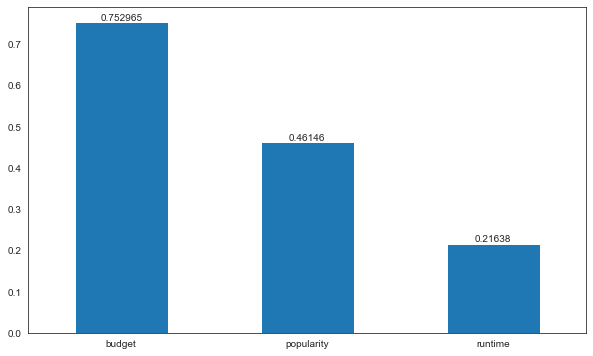

In [679]:
Train.select_dtypes(include=np.number).corr()['revenue'][1:][:-1].plot.bar();
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=360)
fig = plt.gcf()
fig.set_size_inches(10,6) # seems like movie revenue is correlated mostly to the budget

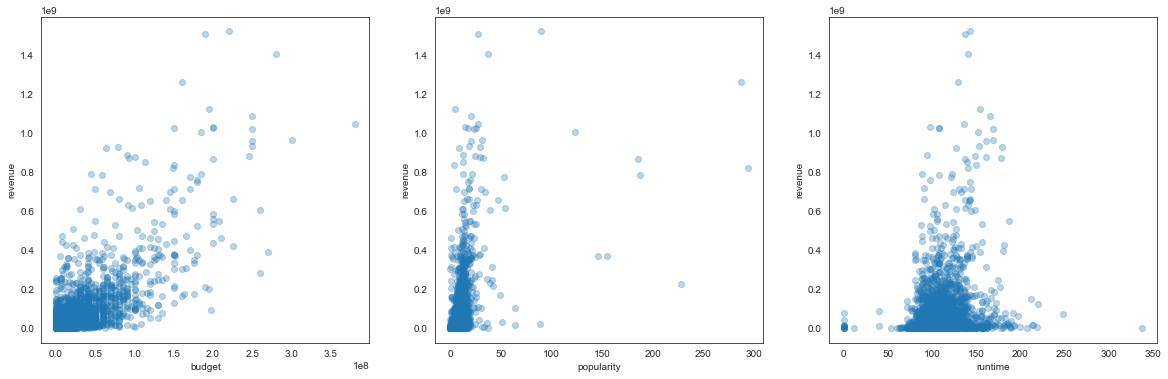

In [680]:
fig, axes  = plt.subplots(1,3, figsize=(20, 6))
axes[0].scatter(Train['budget'], Train['revenue'], alpha=0.3)
axes[0].set_xlabel('budget')
axes[0].set_ylabel('revenue')
axes[1].scatter(Train['popularity'], Train['revenue'], alpha=0.3)
axes[1].set_xlabel('popularity')
axes[1].set_ylabel('revenue')
axes[2].scatter(Train['runtime'], Train['revenue'], alpha=0.3)
axes[2].set_xlabel('runtime')
axes[2].set_ylabel('revenue');

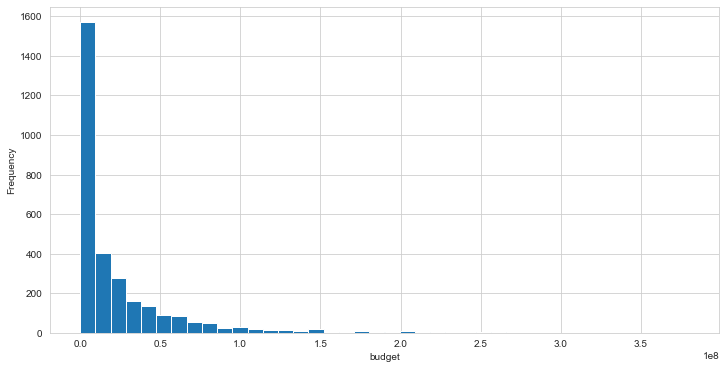

In [681]:
sns.set_style('whitegrid')
Train['budget'].plot.hist(bins=40, edgecolor='white', figsize=(12,6))
plt.xlabel('budget');

### feture engineering: budget

In [682]:
len(Train[Train['budget']<10000]) 

835

In [683]:
low_budget_removed = Train[Train['budget'] > 10000]

In [684]:
low_budget_removed.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,6,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638


In [685]:
low_budget_removed['log_budget'] = np.log1p(low_budget_removed['budget'])
Test['log_budget'] = np.log1p(Test['budget'])

/var/folders/6h/5k5kd9fs35d2zrg3xjk3d2g80000gn/T/ipykernel_782/2326278723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_budget_removed['log_budget'] = np.log1p(low_budget_removed['budget'])


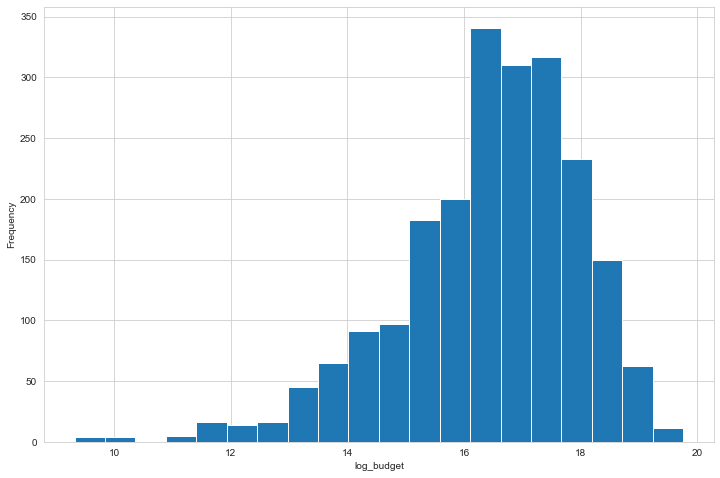

In [686]:
low_budget_removed['log_budget'].plot.hist(bins=20, figsize=(12,8))
plt.xlabel('log_budget');

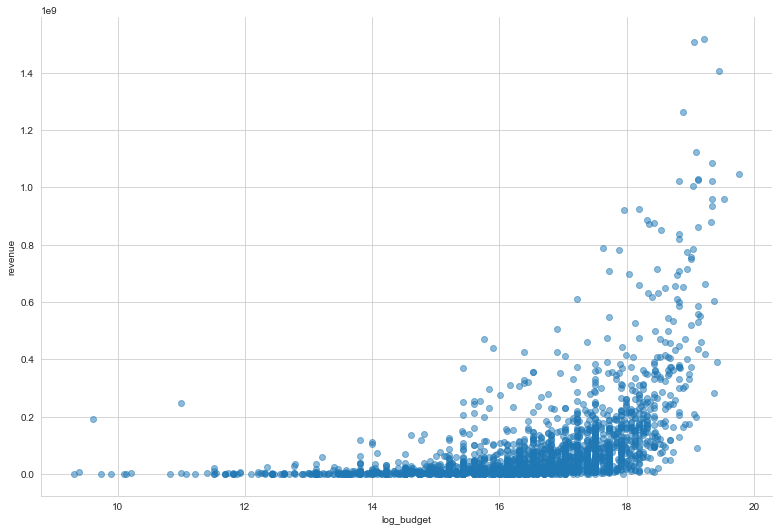

In [687]:
sns.lmplot(x='log_budget', y='revenue', data=low_budget_removed, fit_reg=False, scatter_kws = dict(alpha=0.5))
fig = plt.gcf()
fig.set_size_inches(12, 8)

### feture engineering: genres

In [688]:
def get_dictionary(i):
    try:
        dic = eval(i)
    except:
        dic = {}
    return dic

In [689]:
Train = low_budget_removed.reset_index().drop('index', axis=1)

In [690]:
get_dictionary(Train['genres'][1]) # this is one example 

[{'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 10749, 'name': 'Romance'}]

In [691]:
Train['genres_count'] = Train['genres'].apply(lambda x: len(get_dictionary(x)) if get_dictionary(x) != {} else 0)
Test['genres_count'] = Test['genres'].apply(lambda x: len(get_dictionary(x)) if get_dictionary(x) != {} else 0)

In [692]:
Train.drop('genres', axis=1, inplace=True)

In [693]:
Test.drop('genres', axis=1, inplace=True)

### feture engineering: homepage & imbd_id

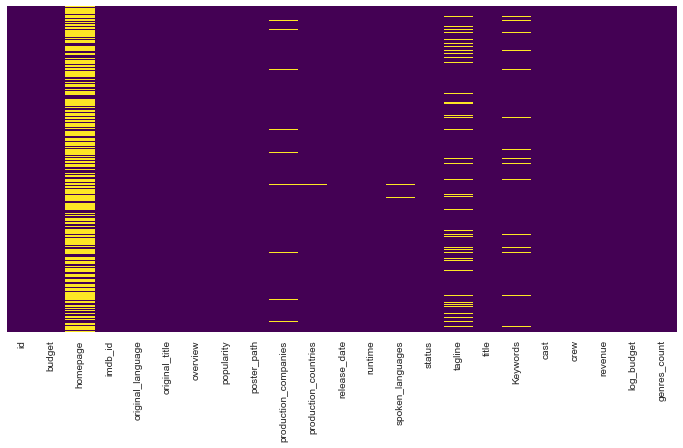

In [694]:
sns.heatmap(Train.isnull(), cmap='viridis', cbar=False, yticklabels=[])
fig = plt.gcf()
fig.set_size_inches(12, 6);

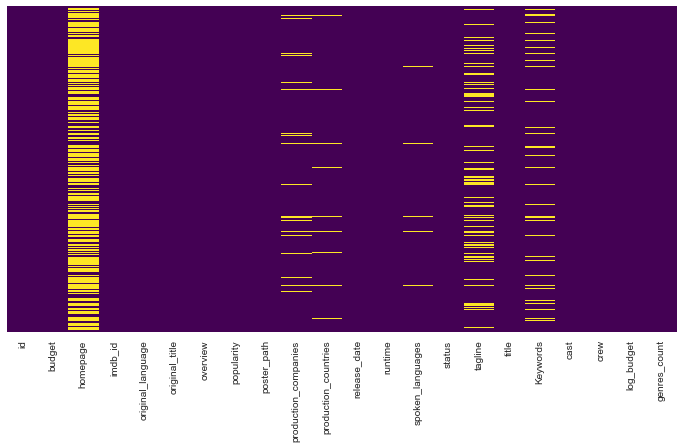

In [695]:
sns.heatmap(Test.isnull(), cmap='viridis', cbar=False, yticklabels=[])
fig = plt.gcf()
fig.set_size_inches(12, 6);

In [696]:
# looking at the figures above, we can drop the homepage column. Also imbd_id is not really useful, we can drop it as well

In [697]:
Train.drop('homepage', axis=1,inplace=True)
Test.drop('homepage', axis=1, inplace=True)

In [698]:
Train.drop('imdb_id', axis=1, inplace=True)
Test.drop('imdb_id', axis=1, inplace=True)

### feture engineering: original language

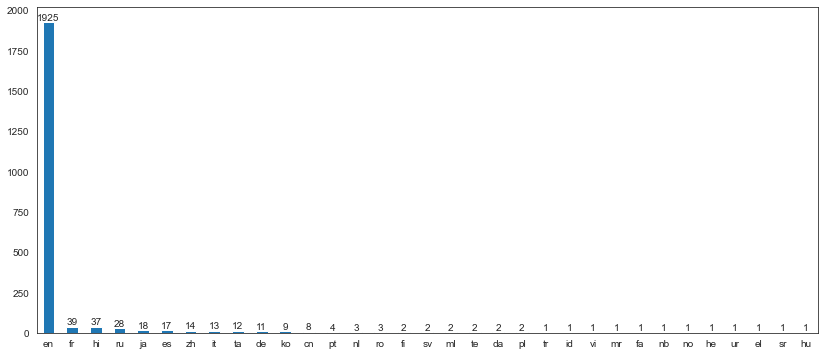

In [699]:
sns.set_style('white')
Train['original_language'].value_counts().plot.bar(figsize=(14, 6))
plt.xticks(rotation=360)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i); 

In [700]:
Train['en_or_not'] = Train['original_language'].apply(lambda x: 1 if x=='en' else 0)
Test['en_or_not'] = Test['original_language'].apply(lambda x: 1 if x=='en' else 0)

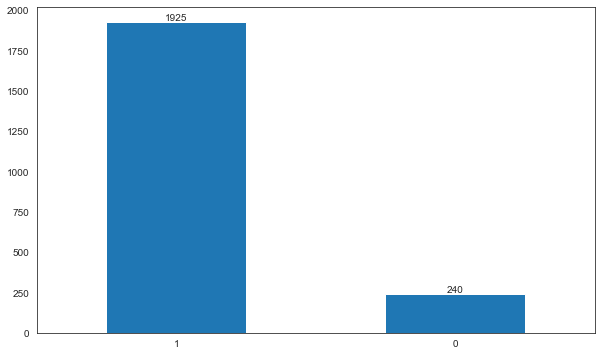

In [701]:
Train['en_or_not'].value_counts().plot.bar(figsize=(10,6))
plt.xticks(rotation=360)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i);

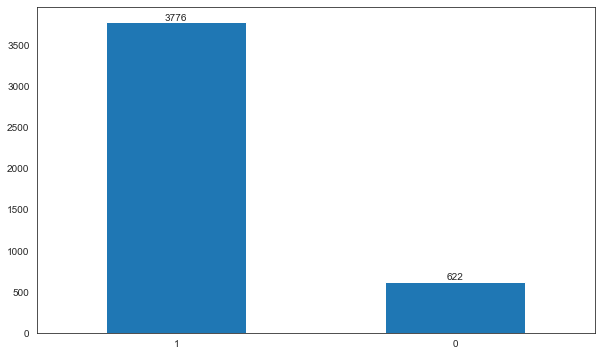

In [702]:
Test['en_or_not'].value_counts().plot.bar(figsize=(10,6))
plt.xticks(rotation=360)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i);

In [703]:
Train.drop('original_language', axis=1, inplace=True)
Test.drop('original_language', axis=1, inplace=True)

### feature engineering: original_title, poster_path, overview

In [704]:
Train.drop(['original_title', 'poster_path', 'overview'], axis=1, inplace=True)
Test.drop(['original_title', 'poster_path', 'overview'], axis=1, inplace=True)

### feature engineering: production_companies

In [705]:
get_dictionary(Train['production_companies'][45])

[{'name': 'Company Films', 'id': 7193},
 {'name': 'Moving Pictures Film and Television', 'id': 7595}]

In [706]:
Train['num_production_companies'] = Train['production_companies'].apply(lambda x: len(get_dictionary(x)) if len(get_dictionary(x)) != 0 else np.nan)
Test['num_production_companies'] = Test['production_companies'].apply(lambda x: len(get_dictionary(x)) if len(get_dictionary(x)) != 0 else np.nan)

In [707]:
Train['num_production_companies'].isnull().sum()

70

In [708]:
Test['num_production_companies'].isnull().sum()

258

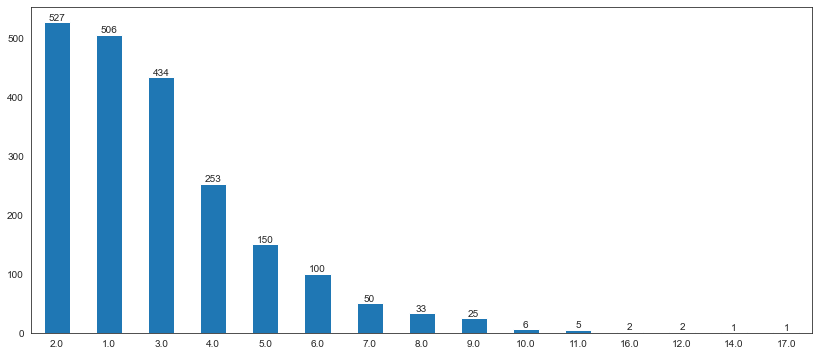

In [709]:
Train['num_production_companies'].value_counts().plot.bar(figsize=(14, 6))
plt.xticks(rotation=360)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i);

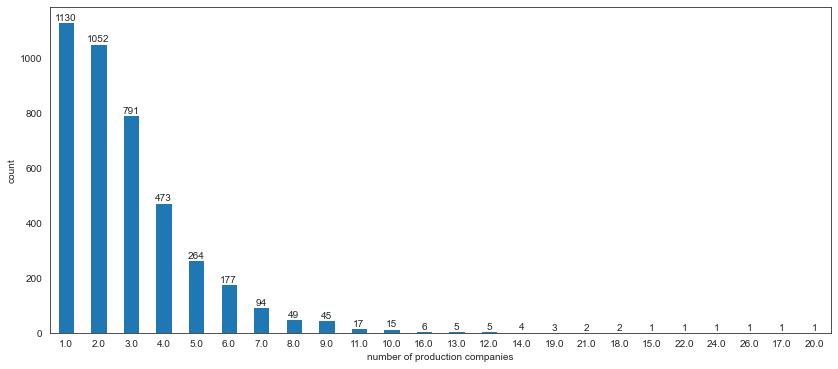

In [710]:
Test['num_production_companies'].value_counts().plot.bar(figsize=(14, 6))
plt.xticks(rotation=360)
plt.xlabel('number of production companies')
plt.ylabel('count')
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i);

In [711]:
Train['num_production_companies'] = Train['num_production_companies'].fillna(Train['num_production_companies'].mean()).round()
Test['num_production_companies'] = Test['num_production_companies'].fillna(Test['num_production_companies'].mean()).round()

In [712]:
Train.drop('production_companies', axis=1, inplace=True)
Test.drop('production_companies', axis=1, inplace=True)

### feature engineering: production_countries

In [713]:
Train['production_countries'].isnull().sum()

19

In [714]:
get_dictionary(Train['production_countries'][57])[1]['name']

'United States of America'

In [715]:
def production_feature(x):
    dic = get_dictionary(x)
    if dic != {}:
        if len(dic)>1:
            countries = []
            for j in range(len(dic)):
                countries.append(dic[j]['name'])
            if 'United States of America' in countries:
                return 'United States of America'
        else:
            return dic[0]['name']
    else:
        return np.nan

In [716]:
Train['production_country'] = Train['production_countries'].apply(production_feature)
Test['production_country'] = Test['production_countries'].apply(production_feature)

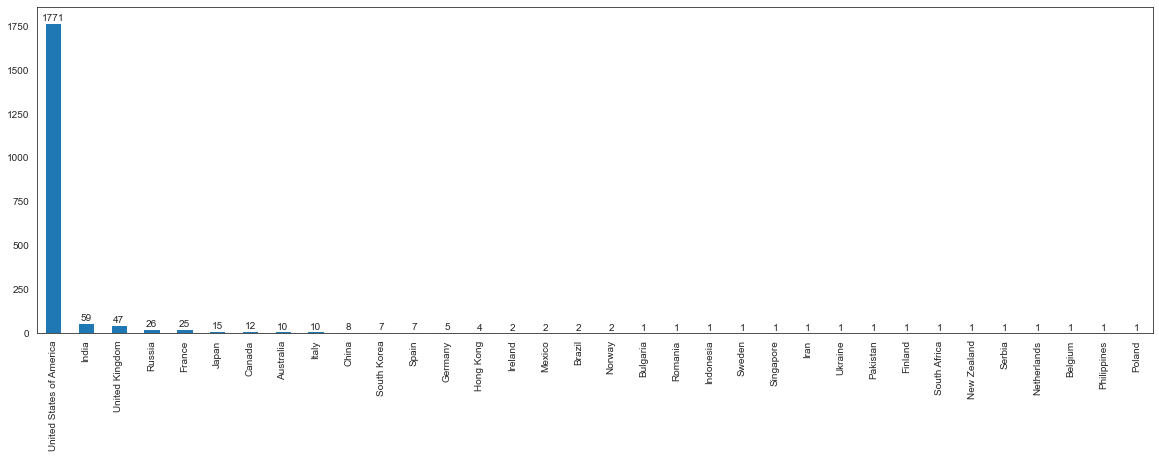

In [717]:
Train['production_country'].value_counts().plot.bar(figsize=(20, 6))
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i); 

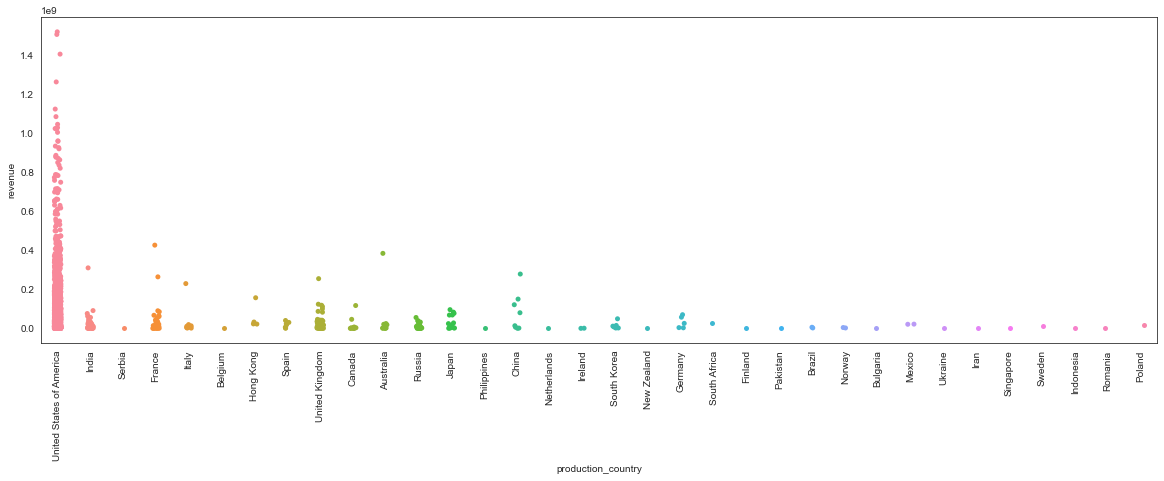

In [718]:
sns.stripplot(x='production_country', y='revenue', data=Train, jitter=True)
ax = plt.gcf()
ax.set_size_inches(20,6)
plt.xticks(rotation=90);

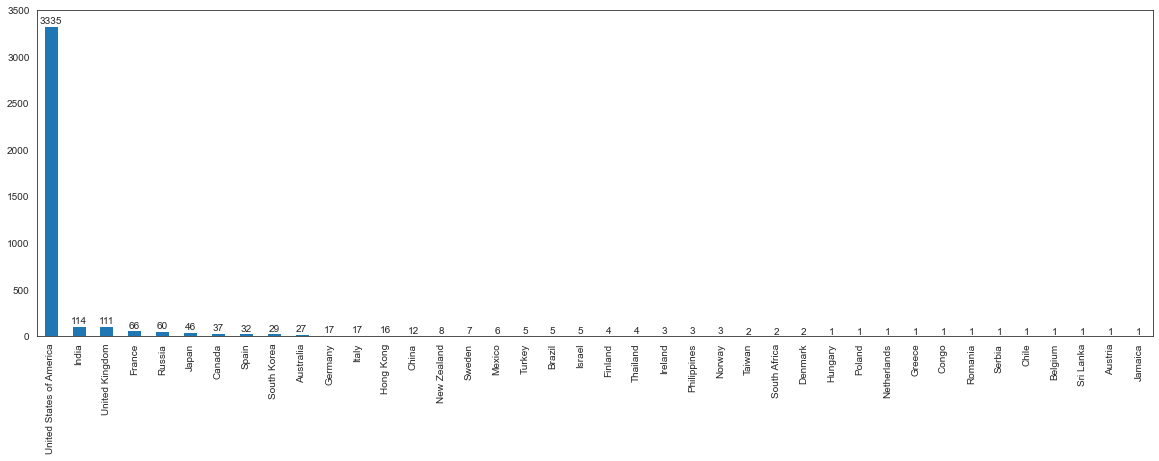

In [719]:
Test['production_country'].value_counts().plot.bar(figsize=(20, 6))
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i); # as we can see, most of the movies are produced in the USA. we can put all the movies that are not produced in the US in one categroy

In [720]:
def feature_engineer(x):
    if x == 'United States of America':
        return 1
    elif str(x) == 'nan' and 'None':
        return np.nan
    else:
        return 0

In [721]:
Train['produced_in_US'] = Train['production_country'].apply(feature_engineer)
Test['produced_in_US'] = Test['production_country'].apply(feature_engineer)

In [722]:
Train['produced_in_US'].isnull().sum()

19

In [723]:
Train.drop(['production_countries', 'production_country'], axis=1, inplace=True)
Test.drop(['production_countries','production_country'], axis=1, inplace=True)

###  feature engineering: spoken_languages

In [724]:
Train['spoken_languages'].isnull().sum()

6

In [725]:
def spoken_languages(x):
    dic = get_dictionary(x)
    if dic != {}:
        return len(dic)
    else:
        return np.nan

In [726]:
Train['num_spoken_languages'] = Train['spoken_languages'].apply(spoken_languages)
Test['num_spoken_languages'] = Test['spoken_languages'].apply(spoken_languages)

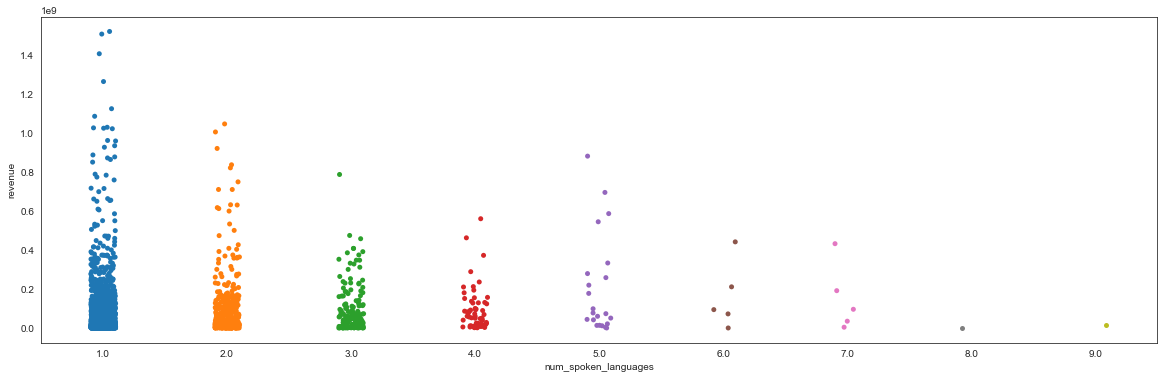

In [727]:
sns.stripplot(x='num_spoken_languages', y='revenue', data=Train)
ax = plt.gcf()
ax.set_size_inches(20,6);

In [728]:
Train['num_spoken_languages'] = Train['num_spoken_languages'].fillna(Train['num_spoken_languages'].mean()).round()
Test['num_spoken_languages'] = Test['num_spoken_languages'].fillna(Test['num_spoken_languages'].mean()).round()

In [729]:
Train.drop('spoken_languages', axis=1, inplace=True)
Test.drop('spoken_languages', axis=1, inplace=True)

### feature engineering: status

In [730]:
Train['status'].isnull().sum()

0

In [731]:
Train['status'].value_counts() # this info is not really useful since only one is not released, we will drop it

Released    2164
Rumored        1
Name: status, dtype: int64

In [732]:
Train.drop('status', axis=1, inplace=True)
Test.drop('status', axis=1, inplace=True)

In [733]:
Train.head()

,id,budget,popularity,release_date,runtime,tagline,title,Keywords,cast,crew,revenue,log_budget,genres_count,en_or_not,num_production_companies,produced_in_US,num_spoken_languages
0,1,14000000,6.575393,2/20/15,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,1,1,3.0,1.0,1.0
1,2,40000000,8.248895,8/6/04,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,4,1,1.0,1.0,1.0
2,3,3300000,64.299990,10/10/14,105.0,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,1,1,3.0,1.0,1.0
3,4,1200000,3.174936,3/9/12,122.0,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,2,0,3.0,0.0,2.0
4,6,8000000,0.743274,8/6/87,83.0,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,3,1,3.0,NaN,1.0


### feature engineering: tagline

In [734]:
from wordcloud import WordCloud

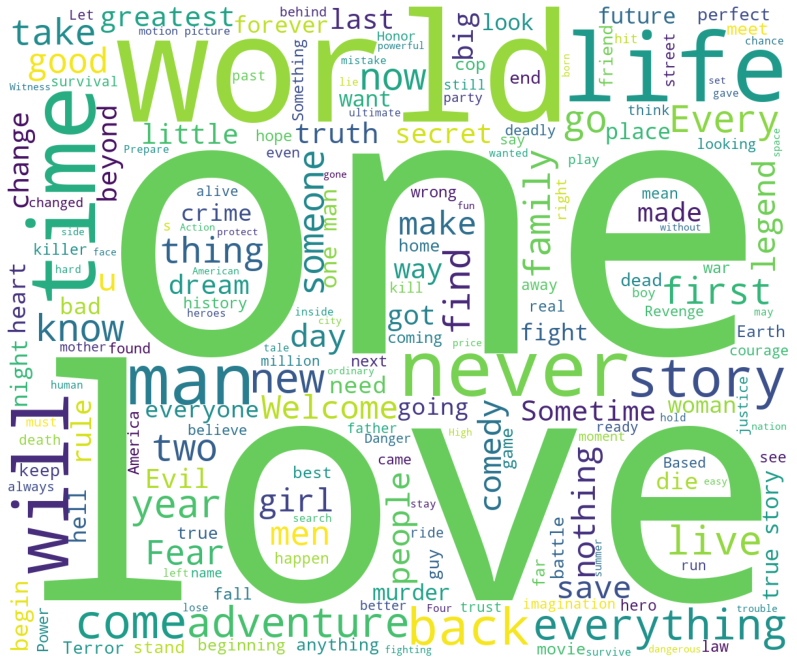

In [735]:
Text = ' '.join(Train['tagline'].fillna('').values)
wordcloud = WordCloud(height=1000, width=1200, background_color='white').generate(Text)
plt.imshow(wordcloud)
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(25, 12)

In [736]:
Train.drop(['tagline', 'title', 'Keywords', 'crew'], axis=1, inplace=True)

In [737]:
Test.drop(['tagline', 'title', 'Keywords', 'crew'], axis=1, inplace=True)

In [738]:
Train.head()

,id,budget,popularity,release_date,runtime,cast,revenue,log_budget,genres_count,en_or_not,num_production_companies,produced_in_US,num_spoken_languages
0,1,14000000,6.575393,2/20/15,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,16.454568,1,1,3.0,1.0,1.0
1,2,40000000,8.248895,8/6/04,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,17.504390,4,1,1.0,1.0,1.0
2,3,3300000,64.299990,10/10/14,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,15.009433,1,1,3.0,1.0,1.0
3,4,1200000,3.174936,3/9/12,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000,13.997833,2,0,3.0,0.0,2.0
4,6,8000000,0.743274,8/6/87,83.0,"[{'cast_id': 6, 'character': 'Pinocchio (voice...",3261638,15.894952,3,1,3.0,NaN,1.0


### feature engineering: cast

In [739]:
def cast_size(x):
    dic = get_dictionary(x)
    if dic != {}:
        return len(dic)
    else:
        return np.nan

In [740]:
Train['cast_size'] = Train['cast'].apply(cast_size)

In [741]:
Test['cast_size'] = Test['cast'].apply(cast_size)

In [742]:
Train['cast_size'] = Train['cast_size'].fillna(Train['cast_size'].mean()).round()
Test['cast_size'] = Test['cast_size'].fillna(Test['cast_size'].mean()).round()

In [743]:
Train.drop('cast', axis=1, inplace=True)
Test.drop('cast', axis=1, inplace=True)

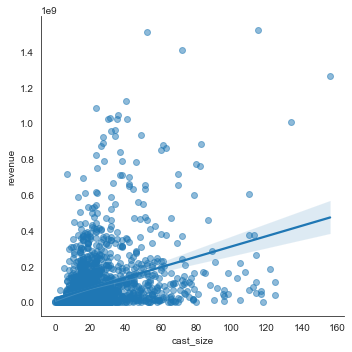

In [744]:
sns.lmplot(x='cast_size', y='revenue', data=Train, fit_reg=True, scatter_kws=dict(alpha=0.5));

In [745]:
Train.head()

,id,budget,popularity,release_date,runtime,revenue,log_budget,genres_count,en_or_not,num_production_companies,produced_in_US,num_spoken_languages,cast_size
0,1,14000000,6.575393,2/20/15,93.0,12314651,16.454568,1,1,3.0,1.0,1.0,24.0
1,2,40000000,8.248895,8/6/04,113.0,95149435,17.504390,4,1,1.0,1.0,1.0,20.0
2,3,3300000,64.299990,10/10/14,105.0,13092000,15.009433,1,1,3.0,1.0,1.0,51.0
3,4,1200000,3.174936,3/9/12,122.0,16000000,13.997833,2,0,3.0,0.0,2.0,7.0
4,6,8000000,0.743274,8/6/87,83.0,3261638,15.894952,3,1,3.0,NaN,1.0,4.0


### feature engineering: release_date

In [746]:
Test['release_date'].isnull().sum()

1

In [747]:
Test.loc[Test['release_date'].isnull()==True, 'release_date'] ='5/1/00'

In [748]:
Train['release_date'] = pd.to_datetime(Train['release_date'], format = '%m/%d/%y')
Test['release_date'] = pd.to_datetime(Test['release_date'], format = '%m/%d/%y')
Train['release_year'] = pd.to_datetime(Train['release_date']).dt.year.astype(int)
Train['release_month'] = pd.to_datetime(Train['release_date']).dt.month.astype(int)
Train['release_day'] = pd.to_datetime(Train['release_date']).dt.dayofweek.astype(int)
Test['release_year'] = pd.to_datetime(Test['release_date']).dt.year.astype(int)
Test['release_month'] = pd.to_datetime(Test['release_date']).dt.month.astype(int)
Test['release_day'] = pd.to_datetime(Test['release_date']).dt.dayofweek.astype(int)

In [749]:
Train.drop('release_date', axis=1, inplace=True)
Test.drop('release_date', axis=1, inplace=True)

In [750]:
Train['release_year'].max()

2068

In [751]:
def fix_date(x):
    if x > 2019:
        return x-100
    else:
        return x

In [752]:
Train['release_year'] = Train['release_year'].apply(fix_date)
Test['release_year'] = Test['release_year'].apply(fix_date)

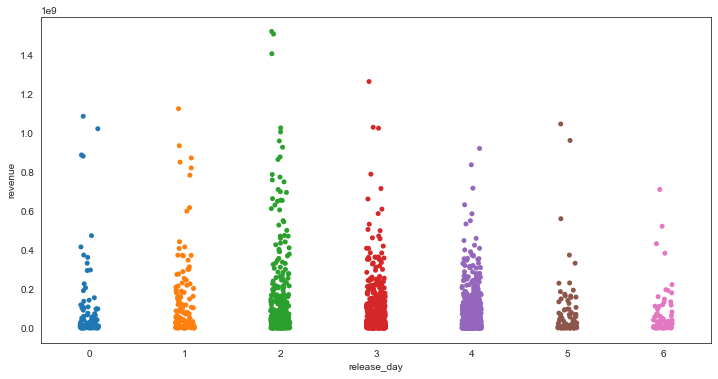

In [753]:
sns.stripplot(x='release_day', y='revenue', data=Train)
ax = plt.gcf()
ax.set_size_inches(12,6);

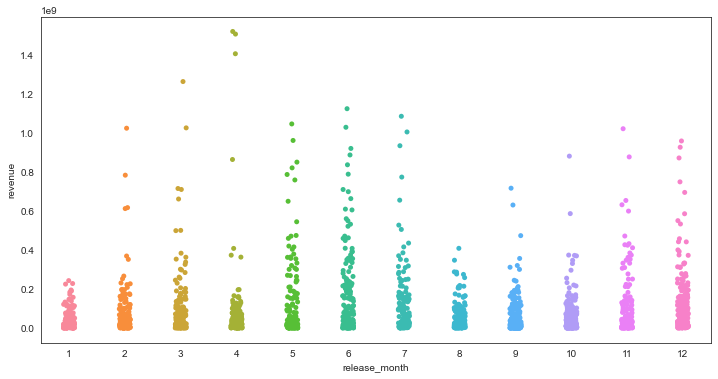

In [754]:
sns.stripplot(x='release_month', y='revenue', data=Train)
ax = plt.gcf()
ax.set_size_inches(12,6);

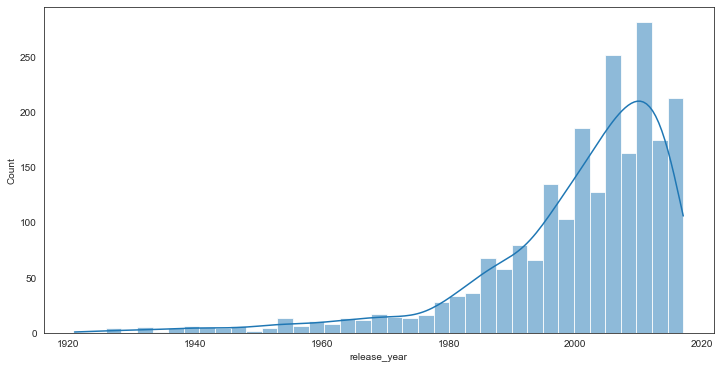

In [755]:
sns.histplot(x=Train['release_year'], kde=True)
ax = plt.gcf()
ax.set_size_inches(12,6);

### feature engineering: runtime

In [756]:
Train['runtime'].isnull().sum()

1

In [757]:
Test['runtime'].isnull().sum()

4

In [758]:
Train['runtime']=Train['runtime'].fillna(Train['runtime'].mean()).round()
Test['runtime']=Test['runtime'].fillna(Test['runtime'].mean()).round()

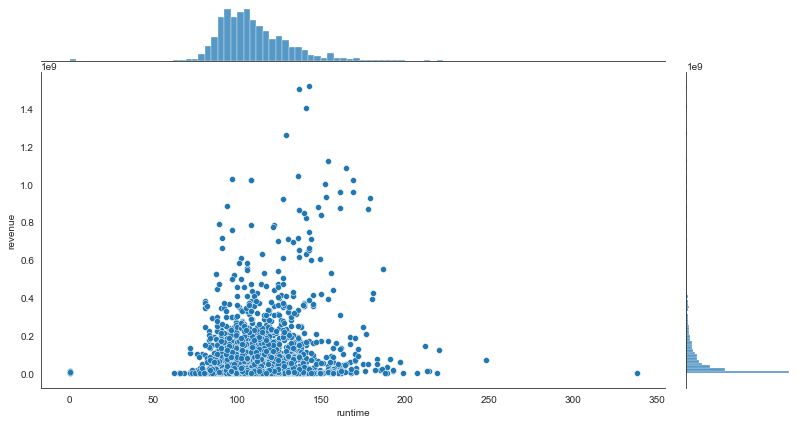

In [759]:
sns.jointplot(x='runtime', y='revenue', data=Train)
ax = plt.gcf()
ax.set_size_inches(12,6);

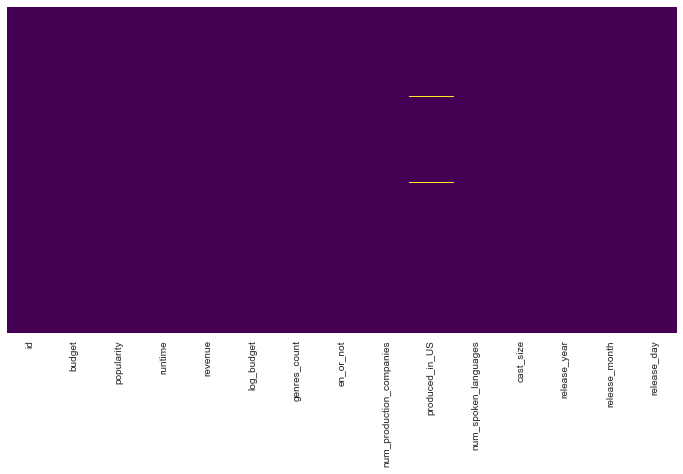

In [760]:
sns.heatmap(Train.isnull(), cmap='viridis', cbar=False, yticklabels=[])
fig = plt.gcf()
fig.set_size_inches(12, 6);

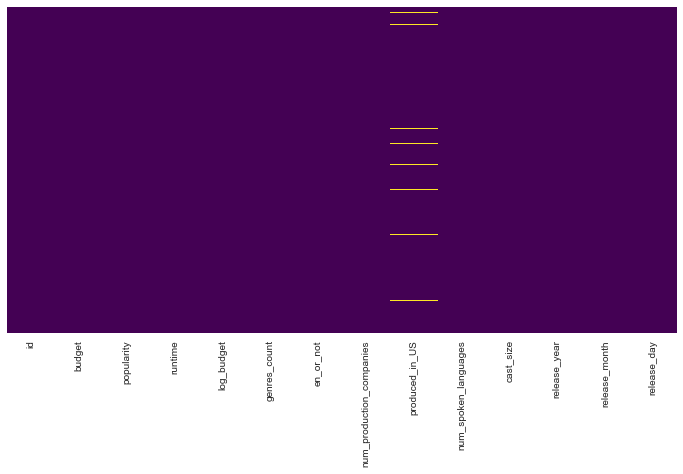

In [761]:
sns.heatmap(Test.isnull(), cmap='viridis', cbar=False, yticklabels=[])
fig = plt.gcf()
fig.set_size_inches(12, 6);

# Build the model for prediction

In [766]:
Top_feature = Train.corr().index[abs(Train.corr()['revenue']>0.2)]

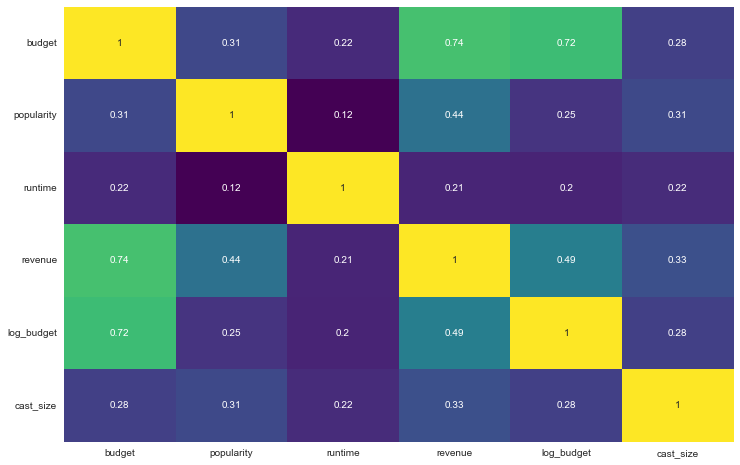

In [777]:
sns.heatmap(Train[Top_feature].corr(), cmap='viridis', annot=True, cbar=False)
fig=plt.gcf()
fig.set_size_inches(12, 8);

In [794]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [779]:
reg = RandomForestRegressor()

In [787]:
Train = Train.dropna()

In [788]:
X = Train.drop('revenue', axis=1).copy()
y = Train['revenue']

In [789]:
reg.fit(X, y)

RandomForestRegressor()

In [791]:
predicted = reg.predict(X)

In [793]:
mean_absolute_error(predicted, y)

19536063.8521808

In [807]:
mean_squared_error(prpedicted, y)

1260853263581673.0

In [808]:
np.sqrt(mean_squared_error(predicted, y))

35508495.653599195

In [810]:
Train.describe()['revenue']

count    2.146000e+03
mean     8.852202e+07
std      1.565751e+08
min      3.000000e+00
25%      7.296885e+06
50%      2.995937e+07
75%      1.010792e+08
max      1.519558e+09
Name: revenue, dtype: float64

In [795]:
r2_score(predicted, y)

0.93515155970011

### make prediction

In [802]:
Test = Test.dropna()

In [803]:
test_id = Test['id']

In [804]:
Test_prediction = reg.predict(Test)

In [805]:
prediction_df = pd.DataFrame({'id':test_id,'predicted_revenue': Test_prediction})

In [806]:
prediction_df

,id,predicted_revenue
0,3001,8.710410e+06
1,3002,1.474871e+07
2,3003,5.785588e+07
3,3004,4.364751e+07
4,3005,8.466287e+06
...,...,...
4393,7394,9.730891e+07
4394,7395,4.496932e+07
4395,7396,1.260786e+08
4396,7397,1.929106e+08
